# Problem Statement

    Your task is to build a banking behavioral scorecard model for internal customers through a user's liability account and predict the credit risk. These are low transacting customers. The definition that is used for the target variable is every 30+ or X+ days delinquent twice in forward  months.

# Hypothesis Generation

The factors which has been considers are,
    1. To Seperate different types of data.
    2. To Normalize the data
    3. To Apply the model for the predictions

# Getting system ready and importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

import copy

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import math

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

# Loading the data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Understanding the data

In [4]:
train.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


In [5]:
train.shape, test.shape

((17521, 2395), (20442, 2394))

# Feature Extraction

In [6]:
train.select_dtypes('float64').shape

(17521, 844)

In [7]:
train.select_dtypes('int64').shape

(17521, 1548)

In [8]:
train.select_dtypes('object').shape

(17521, 3)

# Filling NA Values

In [9]:
train = train.fillna(0)
test = test.fillna(0)

In [10]:
cols_train = train.select_dtypes('object').columns[1:3]

In [11]:
for i in cols_train:
    train.loc[train[i]=='-',i] = 0
    train[i] = train[i].astype('int')

In [12]:
test.select_dtypes('object').shape

(20442, 12)

In [13]:
test.select_dtypes('float64').shape

(20442, 837)

In [14]:
test.select_dtypes('int64').shape

(20442, 1545)

In [15]:
cols_test = test.select_dtypes('object').columns[1:12]

In [16]:
for i in cols_test:
    test.loc[test[i]=='-',i] = 0
    test[i] = test[i].astype('float')

# Data Normalization in all the columns

In [17]:
cols1 = train.drop(['Col1','Col2'],1).columns
cols2 = test.drop(['Col1'],1).columns

In [18]:
train[cols1] = train[cols1].apply(lambda x: (x-x.min()) / (x.max()-x.min()))
test[cols1] = test[cols1].apply(lambda x: (x-x.min()) / (x.max()-x.min()))

# Training and Building the model

In [19]:
xtrain = train.drop(['Col1','Col2'],1)
ytrain = train['Col2']

xtest = test.drop(['Col1'],1)

In [20]:
x_train, x_valid, y_train, y_valid = train_test_split(xtrain, ytrain, test_size = 0.20)

In [21]:
classifier = XGBClassifier(max_depth=5, 
                           n_estimators=109, 
                           colsample_bytree=0.8,
                           subsample=0.8)

classifier = DecisionTreeClassifier()

    Function to fetch the best model estimator

In [22]:
def GradientBooster(param_grid, n_jobs):
    estimator = XGBClassifier(max_depth=5, missing=np.nan)
    classifier = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=n_jobs)
    classifier.fit(xtrain, ytrain)
    print("Best Estimator learned through GridSearch")
    print(classifier.best_estimator_)
    return classifier.best_estimator_

param_grid={'n_estimators':range(100,120),
            'learning_rate': np.arange(0.1,0.9,0.1)# 0.05, 0.02, 0.01], 
            #'max_depth':range(5,8),#4,6], 
            #'min_samples_leaf':range(1,50),#,5,9,17],,#,0.3]#,0.1]
            #'min_samples_split':range(2,100)
            #'max_features':['log2','sqrt']
           }
n_jobs=5
#best_est=GradientBooster(param_grid, n_jobs)

In [23]:
classifier.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=109, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)

# Cross validation of Data

In [24]:
predict_valid = classifier.predict(x_valid)
f1_score(predict_valid, y_valid) * 100

47.13656387665199

In [25]:
predict_test = classifier.predict(xtest)

# Analyzing the output

In [26]:
classifier.score(xtrain, ytrain)

0.9316249072541521

In [27]:
classify = classification_report(y_valid, predict_valid)
confusion = confusion_matrix(y_valid, predict_valid)

In [28]:
file1 = open("classification report.txt","w+") 
file1.write(classify)
file1.close()

In [29]:
np.savetxt('confusion matrix.txt',confusion)

# Deploying the CSV File

In [30]:
submission = pd.DataFrame()
submission['Col1'] = test['Col1']
submission['Col2'] = predict_test
submission.to_csv('sample.csv', index=False)

In [31]:
submission['Col2'].value_counts()

0    20238
1      204
Name: Col2, dtype: int64

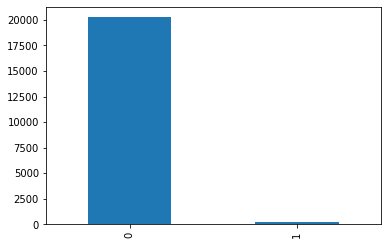

In [32]:
submission['Col2'].value_counts().plot.bar()